# Inicialización de R

In [ ]:
R.version.string

[1] "R version 4.0.5 (2021-03-31)"

## Instalación de paquetes

* `tidyverse` Metapaquete de todos los paquetes tidyverse 
* `caret` Contiene la funcion `confusionMatrix`
* `class` Contiene la funcion `knn`

In [ ]:
if("tidyverse" %in% rownames(installed.packages()) == FALSE) {install.packages("tidyverse")}
if("class" %in% rownames(installed.packages()) == FALSE) {install.packages("class")}
if("caret" %in% rownames(installed.packages()) == FALSE) {install.packages("caret")}
if("gmodels" %in% rownames(installed.packages()) == FALSE) {install.packages("gmodels")}
if("e1071" %in% rownames(installed.packages()) == FALSE) {install.packages("e1071")}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




# Conjunto de Datos
Trabajamos con los datos del sitio: 

    https://www.kaggle.com/zalando-research/fashionmnist

## Contexto

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando, que consta de un conjunto de formación de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos.

## Contenido

Cada imagen contiene 

* $28$ píxeles de alto
* $28$ píxeles de ancho
* $784$ píxeles en total

Cada píxel tiene un solo valor de píxel asociado, lo que indica la claridad u oscuridad de ese píxel, y los números más altos significan más oscuro. Este valor de píxel es un número entero entre $0$ y $255$. Los conjuntos de datos de entrenamiento y prueba tienen $785$ columnas. La primera columna consta de las etiquetas de clase (ver arriba) y representa la prenda de vestir. El resto de las columnas contienen los valores de píxeles de la imagen asociada.


Para ubicar un píxel en la imagen, suponga que hemos descompuesto $x$ como $x = i \times 28 + j$, donde $i$ y $j$ son números enteros entre $0$ y $27$. El píxel está ubicado en la fila $i$ y la columna $j$ de una matriz de $28 \times 28$. Por ejemplo, `pixel31` indica el píxel que está en la cuarta columna desde la izquierda y la segunda fila desde la parte superior.

### Lectura y almacenamiento de datos




In [ ]:
# 1. Lectura y almacenamiento de datos en data.frame
data <- read.csv("fashion-mnist_train.csv")
# 2. Observacion algunos registros, nombres de variablesy tipos.
head(data, 3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,⋯,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,5,0,⋯,0,0,0,30,43,0,0,0,0,0


In [ ]:
print(dim(data)) # Verificamos que efectivamente contemos con todos los datos.

[1] 60000   785


### Etiquetas

In [ ]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
data <- mutate(
    data, 
    label = fct_recode(
        as.character(data$label),
        "T-shirt/top" = "0",
        "Trouser" = "1",
        "Pullover" = "2",
        "Dress" = "3",
        "Coat" = "4",
        "Sandal" = "5",
        "Shirt" = "6",
        "Sneaker" = "7",
        "Bag" = "8",
        "Ankle boot" = "9" 
    )
)

labels <- unique(data$label)
labels

[1] Pullover    Ankle boot  Shirt       T-shirt/top Dress       Coat       
 [7] Sandal      Bag         Sneaker     Trouser    
10 Levels: T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker ... Ankle boot

### Elección de subconjunto

Haciendo algunas pruebas me doy cuenta que la función de R para construir un clasificador basado en $K-NN$ tarda demasiado, por lo que tomamos un subconjunto de tamaño 1000.

In [ ]:
# 1. Tomamos la misma cantidad para cada clase
class_size <- 200
# 2. Filtramos datos por etiqueta
class_0 <- filter(data, label == "T-shirt/top")[1:class_size,] 
class_1 <- filter(data, label == "Trouser")[1:class_size,]
class_2 <- filter(data, label == "Pullover")[1:class_size,]
class_3 <- filter(data, label == "Dress")[1:class_size,]
class_4 <- filter(data, label == "Coat")[1:class_size,]
class_5 <- filter(data, label == "Sandal")[1:class_size,]
class_6 <- filter(data, label == "Shirt")[1:class_size,]
class_7 <- filter(data, label == "Sneaker")[1:class_size,]
class_8 <- filter(data, label == "Bag")[1:class_size,]
class_9 <- filter(data, label == "Ankle boot")[1:class_size,]
# 3. Concatenamos
data <- rbind(
    class_0, class_1, 
    class_2, class_3, 
    class_4, class_5, 
    class_6, class_7, 
    class_8, class_9
)
head(data, 3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,⋯,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,T-shirt/top,0,0,0,1,2,0,0,0,0,⋯,3,0,0,0,0,1,0,0,0,0
2,T-shirt/top,0,0,0,0,1,0,0,0,0,⋯,164,177,163,0,0,1,0,0,0,0
3,T-shirt/top,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0


Obtenemos la cantidad de observaciones y la dimensión (Recordando que una pertenece a la etiqueta)

* $2000$ Observaciones.
* $28 \times 28 = 784$ Características más una perteneciente a la etiqueta.

In [ ]:
N <- dim(data)[1]
d <- dim(data)[2]
print(c(N, d))

[1] 2000  785


### Proporcion de clases

Notamos que todas las clases tienen 10% de proporcion del conjunto.

In [ ]:
round(prop.table(table(data$label)) * 100, 1)


T-shirt/top     Trouser    Pullover       Dress        Coat      Sandal 
         10          10          10          10          10          10 
      Shirt     Sneaker         Bag  Ankle boot 
         10          10          10          10 

## Visualización

Utilizamos las componentes principales para una visualización en el plano de los datos. Podemos notar que los datos se mezclan mucho en esta visualización, sin ambargo, es posible ver que los colores cambian desde la parte superior a la inferior del plano.

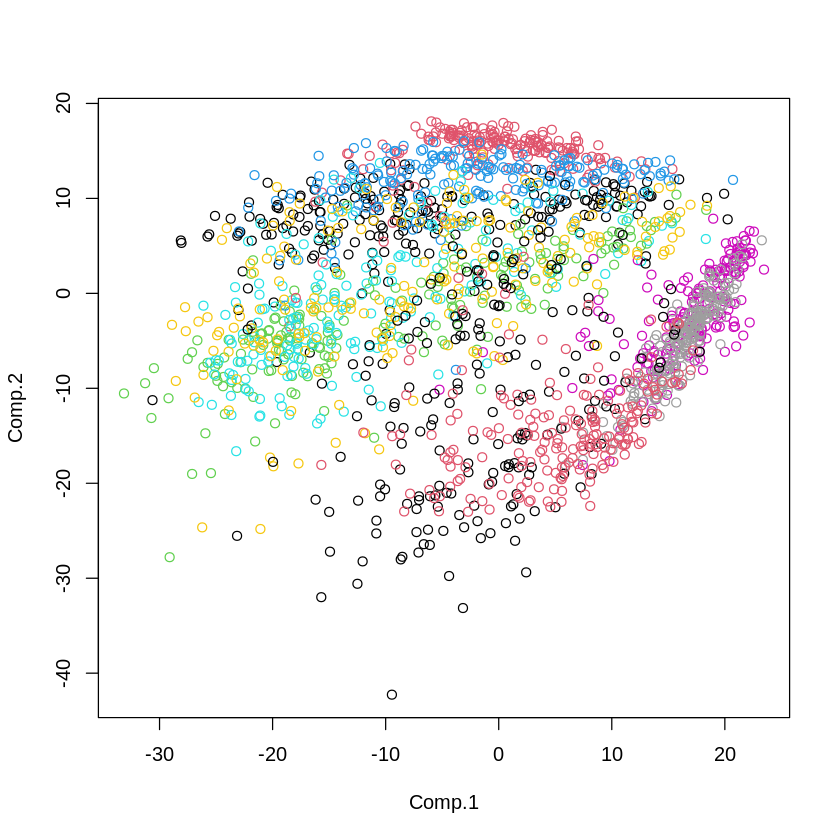

In [ ]:
# 1. Calculo de componentes principales a partir de matriz de correlacion
pca <- princomp(select(data, -label), cor = TRUE)

plot(pca$scores[,1:2], xlim = range(pca$scores[,1]), ylim = range(pca$scores[,2]), col=data$label)

# División en conjuntos de entrenamiento y prueba


In [ ]:
# 1. Dividimos en conjuntos disjuntos de 75% y 25% del total
sample_proportion <- 0.75
# 2. Calculamos el tamanio del conjunto de entrenamiento
sample_size <- floor(0.75 * nrow(data))
# 3. Agregamos semilla para poder reproducir la misma particion
set.seed(123)
# 4. Obtenemos los indices correspondientes al conjunto de entrenamiento
train_ind <- sample(seq_len(nrow(data)), size = sample_size)
# 5. Dividimos en conjunto de entrenmiento y prueba usando los indices
train <- data[train_ind, ]
test <- data[-train_ind, ]

In [ ]:
# 1. Separamos caracteristicas de etiquetas en el conjunto de entrenamiento
X_train <- select(train, -c(label))
Y_train <- train$label
# 2. Separamos caracteristicas de etiquetas en el conjunto de prueba
X_test <- select(test, -c(label))
Y_test <- test$label

In [ ]:
print(c(dim(X_train), dim(X_test)))
print(c(length(Y_train), length(Y_test)))

[1] 1500  784  500  784
[1] 1500  500


# Entrenamiento del modelo

Ahora nos disponemos a clasificar nuestras observaciones. $K-NN$ no hace ningún aprendizaje, simplemente almacena los datos de entrenamiento. Los ejemplos de prueba sin etiqueta se comparan con los registros más similares en el conjunto de entrenamiento utilizando una función de distancia, y al ejemplo sin etiqueta se le asigna la etiqueta que mayor se repite en sus $K$ vecinos.



In [ ]:
library(class) # Para funcion knn
library(caret) # Para funcion confusionMAtrix
library(gmodels)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




* Hacemos uso de la funcion `knn` del paquete `class` y calculamos el error haciendo uso de la funcion `confusionMatrix` la cual calcula, entre otros objetos, la precision ("Accuracy") de un clasificador, esto es, la proporcion de observaciones bien clasificadas, y por lo tanto el error que queremos calcular es $$1 - Accuracy$$ Por lo que iteramos sobre un conjunto de posibles $k$ y nos quedamos con el que obtenga un valor $1 - Accuracy$ mínimo.
* Debemos definir un conjunto de candidatos a $k$, para este caso decidimos elegir un número cercano a $$\frac{N}{n\_classes} = \frac{2000}{10} = 200$$ Dado que tardaba demasiado con ese espacio de búsqueda, elegimos un rango un poco menor: $[1,100]$

In [ ]:
# 1. Definimos inicialmente k = 1 como el optimo, con un error de 100.0%
k_optim <- 1
error_optim <- 1.0
# 2. Definimos el rango en el que se encuentran las k's candidatas
k_max <- 100
# 3. Inicializamos una lista donde guardamos error para cada k candidata
error_k <- c()
# 4. Construimos clasificadores y guardamos la k optima
for(k in 1:k_max){
    # Entrenamos y obtenemos predicion para el conjunto de prueba
    Y_predicted <- knn(X_train, X_test, cl = Y_train, k = k)
    # Obtenemos matriz de confusion y actualizamos la k optima minimizando error
    matrix <- confusionMatrix(data = Y_predicted, reference = Y_test)
    if( error_optim >  1.0 - matrix$overall["Accuracy"] ){
        error_optim <- 1.0 - matrix$overall["Accuracy"]
        k_optim <- k
    }
    error_k <- c(error_k, 1.0 - matrix$overall["Accuracy"])
}
# 5. Imprimimmos k optima con precision en el conjunto de prueba
print(c(k_optim, error_optim))

         Accuracy 
   6.000    0.218 


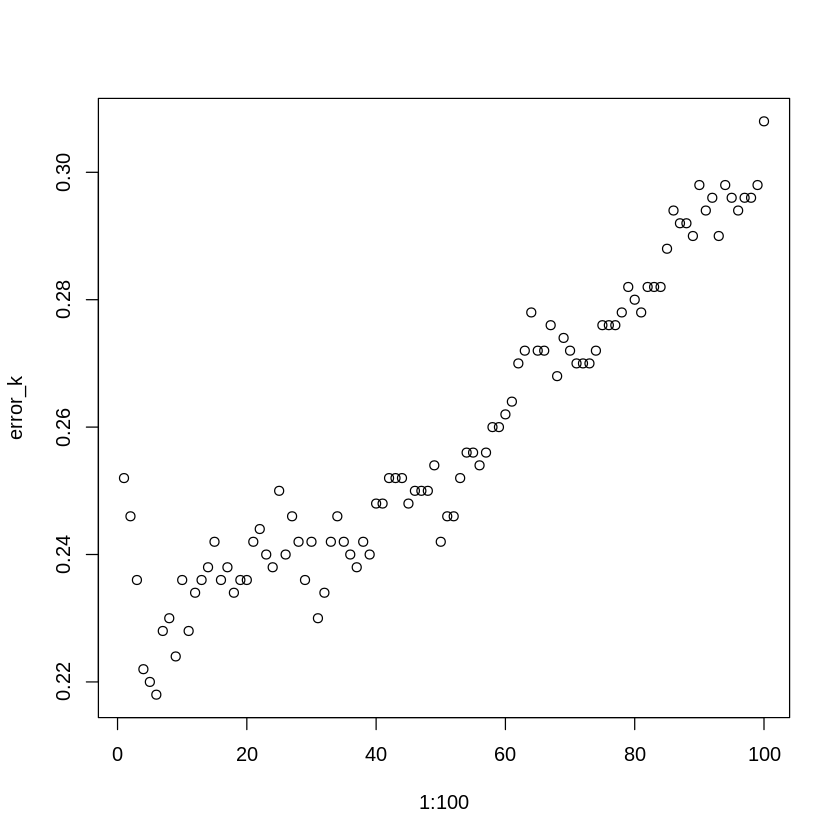

In [ ]:
plot(1:100, error_k)

# Evaluación del modelo

Como vimos en el entrenamiento, nuestro clasificador basado en $K-NN$ para una $k = 6$ obtiene un error sobre el conjunto de prueba de $0.218$.

In [ ]:
Y_predicted <- knn(X_train, X_test, cl = Y_train, k = k_optim)
matrix <- confusionMatrix(data = Y_predicted, reference = Y_test)

matrix$overall["Accuracy"]
matrix$overall
matrix$table

Accuracy 
   0.772

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  7.720000e-01   7.466667e-01   7.326752e-01   8.080735e-01   1.120000e-01 
AccuracyPValue  McnemarPValue 
 2.173352e-258            NaN

             Reference
Prediction    T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag
  T-shirt/top          39       0        1     2    1      0     4       0   0
  Trouser               0      50        0     3    0      0     0       0   0
  Pullover              2       0       30     0    4      0     7       0   1
  Dress                 2       3        1    36    4      0     4       0   0
  Coat                  0       0       12     1   36      0    10       0   1
  Sandal                0       0        0     0    0     30     0       0   0
  Shirt                 4       0       12     0    4      0    27       0   1
  Sneaker               0       0        0     0    0     17     0      49   0
  Bag                   0       0        0     0    0      0     1       0  44
  Ankle boot            0       0        0     0    0      5     0       6   0
             Reference
Prediction    Ankle boot
  T-shirt/top          0
  Trouser              0
  Pullover

# Complejidad de clasificador

En clase vimos que $$ \frac{n}{k} $$ refleja la complejidad de un clasificador $K-NN$. Notemos que para nuestro clasificador este valor es $$\frac{n}{k} = \frac{2000}{6} = \frac{1000}{3} = 333.333...$$

In [ ]:
N  / k_optim

[1] 333.3333

# Conclusiones

* Como vimos en el entrenamiento, nuestro clasificador basado en $K-NN$ para una $k = 6$ obtiene un error sobre el conjunto de prueba de $0.218$, sin embargo, debemos considerar que pueden existir empates y desconozco como maneja estos casos la función `knn`. Una solución puede ser elegir un $k$ que asegure que no existirán empates, pero dado que tenemos más de dos clases no podemos asegurar nada.
* Recordemos que el error (Calculado sobre datos no usados en el entrenamiento) aproxima, según la ley de los grandes números, la probabilidad de que nuestro clasificador se equivoque. Por otro lado, tambien tenemos que tener en cuenta que la cantidad de observaciones usadas para probar el clasificador es pequeño, por lo que no podemos confiar tanto en este valor.